In [1]:
from synthetic_data import *
from projected_gradient_descent import *
from alternative_minimization import *
from logdet import *
from performance_eval import *

## Synthetic Data

In [2]:
n, p = 10, 100
L_orig, X = make_data(n=n, p=p)

## Alternative Minimization (Primal formulation for $L$)

iteration #0
primal value is 17.076589371301807
iteration-0: obj value = 16.97733547863742
iteration #1
primal value is 16.879220750918357
iteration-1: obj value = 16.977299509764947


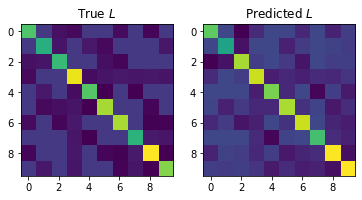

condition positive:24, prediction positive:35, true_positive:23
precision:0.6571428571428571, recall:0.9583333333333334, f-score:0.7796610169491525, NMI:0.19610892993987314, pearson R:0.7652620022180291


/home/psycuser/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [3]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=False)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Alternative Minimization (Dual formulation for $L$)

iteration #0
dual value is 17.076590070476577
iteration-0: obj value = 16.977332518535597
iteration #1
dual value is 16.879220602734847
iteration-1: obj value = 16.977300148081177


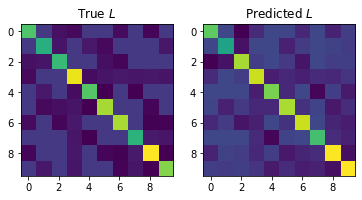

condition positive:24, prediction positive:35, true_positive:23
precision:0.6571428571428571, recall:0.9583333333333334, f-score:0.7796610169491525, NMI:0.19610892993987314, pearson R:0.7652620123754025


In [4]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=True)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Projected Gradient Descent

final objective value = 16.97673714881576
final objective value = 16.97668245119348
final objective value = 16.976709871428195
final objective value = 16.976631726324506
final objective value = 16.976663465331
final objective value = 16.976700159188983
final objective value = 16.97662166270669
final objective value = 16.97667973809311
final objective value = 16.97672368453909
final objective value = 16.97668714768166


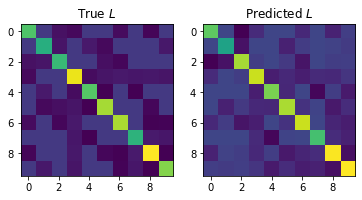

condition positive:24, prediction positive:35, true_positive:23
precision:0.6571428571428571, recall:0.9583333333333334, f-score:0.7796610169491525, NMI:0.19610892993987314, pearson R:0.7656943635952189


In [5]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 1000
eta_L = 0.5
eta_Y = 0.5
    
num_inits = 10
objective_values = np.zeros((num_inits))
L_opt_values = np.zeros((n, n, num_inits))
Y_opt_values = np.zeros((n, p, num_inits))

for idx_init in range(num_inits):

    L_init = project_L(np.random.rand(n,n))

    ret_tuple = proj_grad_descent(X, alpha=alpha, beta=beta, L_init=L_init, 
                                  num_iters=num_iters, eta_L=eta_L, eta_Y=eta_Y)
   
    L_opt_values[:, :, idx_init] = ret_tuple[0]
    Y_opt_values[:, :, idx_init] = ret_tuple[1]
    objective_values[idx_init] = ret_tuple[2]

idx_init_best = np.argmin(objective_values)
L_opt = L_opt_values[:, :, idx_init_best]
Y_opt = Y_opt_values[:, :, idx_init_best]
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Method for comparison

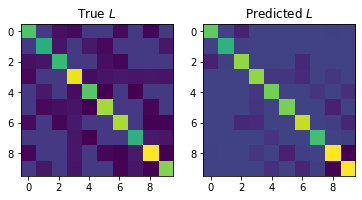

condition positive:24, prediction positive:16, true_positive:14
precision:0.875, recall:0.5833333333333334, f-score:0.7000000000000001, NMI:0.21148939313585813, pearson R:0.4712216733184466


In [6]:
lam = 1e1
L_opt = logdet(X, lam)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")